# Business Problem 
**"The labor problem"** is the economics term widely used toward the turn of the twentieth century 
with various applications.It has been defined in many ways, such as "the problem of improving 
the conditions of employment of the wage-earning classes." It encompasses the difficulties faced 
by wage-earners and employers who began to cut wages for various reasons including increased 
technology, desire for lower costs or to stay in business. 

Now the laor organization, https://labour.gov.in/lcandilasdivision/india-ilo the indian version of this 
recently published the data for the 1974 and 1975 and wanted to demo of data science such that 
the data of 1978 labor can be predicted. Now the problem is the data is a copy of USA version 
and have race in it. 

Data Contains **Age, Race, Educational detail and Labour earning for 1974, 1975**. The problem 
we are solving is the prediction of the future labours earning. The earning can be dependant on 
many of the variables. We have data for following 

- Age of the person. 
- Race : Is he/she is black or not black. 
- Education Details : How qualified the person is? 
- Hispanic : Is that person is Hispanic or not? 
- Married : Does marriage affect the earnings. And other informations.

# Import Libraries

In [145]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

import warnings
warnings.filterwarnings('ignore')

# Data Understanding & Cleaning

In [127]:
data = pd.read_csv('LabourTrainingEvaluationData.csv')
data.head()

,Age,Eduacation,Race,Hisp,MaritalStatus,Nodeg,Earnings_1974,Earnings_1975,Earnings_1978
0,45,LessThanHighSchool,NotBlack,NotHispanic,Married,1,21516.670,25243.550,25564.670
1,21,Intermediate,NotBlack,NotHispanic,NotMarried,0,3175.971,5852.565,13496.080
2,38,HighSchool,NotBlack,NotHispanic,Married,0,23039.020,25130.760,25564.670
3,48,LessThanHighSchool,NotBlack,NotHispanic,Married,1,24994.370,25243.550,25564.670
4,18,LessThanHighSchool,NotBlack,NotHispanic,Married,1,1669.295,10727.610,9860.869


In [128]:
data.shape

(15992, 9)

In [129]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15992 entries, 0 to 15991
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Age            15992 non-null  int64  
 1   Eduacation     15992 non-null  object 
 2   Race           15992 non-null  object 
 3   Hisp           15992 non-null  object 
 4   MaritalStatus  15992 non-null  object 
 5   Nodeg          15992 non-null  int64  
 6   Earnings_1974  15992 non-null  float64
 7   Earnings_1975  15992 non-null  float64
 8   Earnings_1978  15992 non-null  float64
dtypes: float64(3), int64(2), object(4)
memory usage: 1.1+ MB


In [130]:
data.describe()

,Age,Nodeg,Earnings_1974,Earnings_1975,Earnings_1978
count,15992.000000,15992.000000,15992.000000,15992.000000,15992.000000
mean,33.225238,0.295835,14016.800304,13650.803376,14846.659673
std,11.045216,0.456432,9569.795893,9270.403225,9647.391524
min,16.000000,0.000000,0.000000,0.000000,0.000000
25%,24.000000,0.000000,4403.452250,4398.823000,5669.298000
50%,31.000000,0.000000,15123.580000,14557.110000,16421.975000
75%,42.000000,1.000000,23584.180000,22923.737500,25564.670000
max,55.000000,1.000000,25862.320000,25243.550000,25564.670000


In [131]:
data.isnull().sum()

Age              0
Eduacation       0
Race             0
Hisp             0
MaritalStatus    0
Nodeg            0
Earnings_1974    0
Earnings_1975    0
Earnings_1978    0
dtype: int64

In [132]:
int(data.duplicated().sum())

2002

In [133]:
duplicate_percentage = (data.duplicated().sum() / len(data)) * 100
print(f"Duplicate Percentage: {duplicate_percentage:.2f}%")

Duplicate Percentage: 12.52%


In [134]:
# Remove duplicate values
data.drop_duplicates(inplace=True)

In [135]:
for col in data.select_dtypes(exclude=['int','float']):
    print(data[col].value_counts())
    print()

Eduacation
HighSchool            5348
LessThanHighSchool    4413
Intermediate          2333
graduate              1151
PostGraduate           745
Name: count, dtype: int64

Race
NotBlack    12841
black        1149
Name: count, dtype: int64

Hisp
NotHispanic    12851
hispanic        1139
Name: count, dtype: int64

MaritalStatus
Married       9511
NotMarried    4479
Name: count, dtype: int64



In [136]:
data.select_dtypes(include=['float']).skew()

Earnings_1974   -0.082192
Earnings_1975   -0.067150
Earnings_1978   -0.235820
dtype: float64

<Axes: >

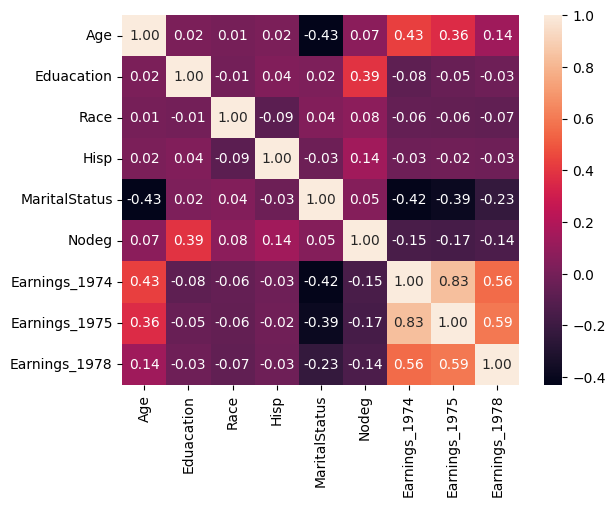

In [150]:
sns.heatmap(labeled_data.corr(), annot=True, fmt='.2f')

# Model Training

In [137]:
labeled_data = data.copy()

In [138]:
encoder = LabelEncoder()
categorical_cols = labeled_data.select_dtypes(include='object').columns
for col in categorical_cols:
    labeled_data[col] = encoder.fit_transform(labeled_data[col])

In [139]:
labeled_data.head()

,Age,Eduacation,Race,Hisp,MaritalStatus,Nodeg,Earnings_1974,Earnings_1975,Earnings_1978
0,45,2,0,0,0,1,21516.670,25243.550,25564.670
1,21,1,0,0,1,0,3175.971,5852.565,13496.080
2,38,0,0,0,0,0,23039.020,25130.760,25564.670
3,48,2,0,0,0,1,24994.370,25243.550,25564.670
4,18,2,0,0,0,1,1669.295,10727.610,9860.869


In [156]:
X = labeled_data.drop('Earnings_1978', axis=1)
y = labeled_data['Earnings_1978']

In [157]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=40)

In [158]:
LR = LinearRegression()
LR.fit(X_train, y_train)

LinearRegression()

In [159]:
y_pred = LR.predict(X_test)
y_pred

array([14436.22781612,  9615.82705561,  8965.12046855, ...,
       16737.43320265,  6588.99998754, 17973.4840919 ], shape=(3498,))

# Model Evaluations

In [160]:
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print(f"Mean Absolute Error: {mae:.3f}")
print(f"Root Mean Squared Error: {rmse:.3f}")
print(f"R2 Score: {r2:.3f}")

Mean Absolute Error: 5640.717
Root Mean Squared Error: 7270.141
R2 Score: 0.393


# Conclusion

* The **R² score of 0.393** indicates that approximately **39.3% of the variance** in the labor earnings can be explained by the model features. While this shows some predictive power, it also suggests that there are **other influential factors** (economic, societal, etc.) not captured in the current dataset.
* 
* The **high MAE (5640.717) and RMSE (7270.141)** values indicate considerable average prediction error, implying that the model **may not be suitable for high-accuracy individual predictions** but can be useful for **trend-level analysis**.